# Quadeer Shaikh M.Tech AI 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

plt.rcParams["figure.figsize"] = (20,8)
plt.rcParams.update({'font.size': 16})
sns.set_style(style='dark')

### Context
- An international e-commerce company based wants to discover key insights from their customer database. They want to use some of the most advanced machine learning techniques to study their customers. The company sells electronic products.

**Data Source:** https://www.kaggle.com/prachi13/customer-analytics / kaggle datasets download -d prachi13/customer-analytics

This notebook contains a very basic EDA and preprocessing and experiments various combination of layers for different neural network architectures

In [2]:
data = pd.read_csv("customer-analytics/train.csv")

In [3]:
data.head(10)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
5,6,F,Flight,3,1,162,3,medium,F,12,1417,1
6,7,D,Flight,3,4,250,3,low,F,3,2371,1
7,8,F,Flight,4,1,233,2,low,F,48,2804,1
8,9,A,Flight,3,4,150,3,low,F,11,1861,1
9,10,B,Flight,3,2,164,3,medium,F,29,1187,1


### Meta Data
- **ID:** ID Number of Customers.
- **Warehouse block:** The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
- **Mode of shipment:** The Company Ships the products in multiple way such as Ship, Flight and Road.
- **Customer care calls:** The number of calls made from enquiry for enquiry of the shipment.
- **Customer rating:** The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
- **Cost of the product:** Cost of the Product in US Dollars.
- **Prior purchases:** The Number of Prior Purchase.
- **Product importance:** The company has categorized the product in the various parameter such as low, medium, high.
- **Gender:** Male and Female.
- **Discount offered:** Discount offered on that specific product.
- **Weight in gms:** It is the weight in grams.
- **Reached on time:** It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

### Data Info
- Column Names
- Null value counts
- Data types

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


## EDA and Preprocessing

### Descriptive Stats

In [5]:
data.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


### Categorical Feature Counts

In [6]:
for col in data.select_dtypes(include=['object']).columns:
    print(data[col].value_counts())
    print('------------------------------------')

F    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_block, dtype: int64
------------------------------------
Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64
------------------------------------
low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64
------------------------------------
F    5545
M    5454
Name: Gender, dtype: int64
------------------------------------


### Do warehouse blocks have any impact on the delivery time ?

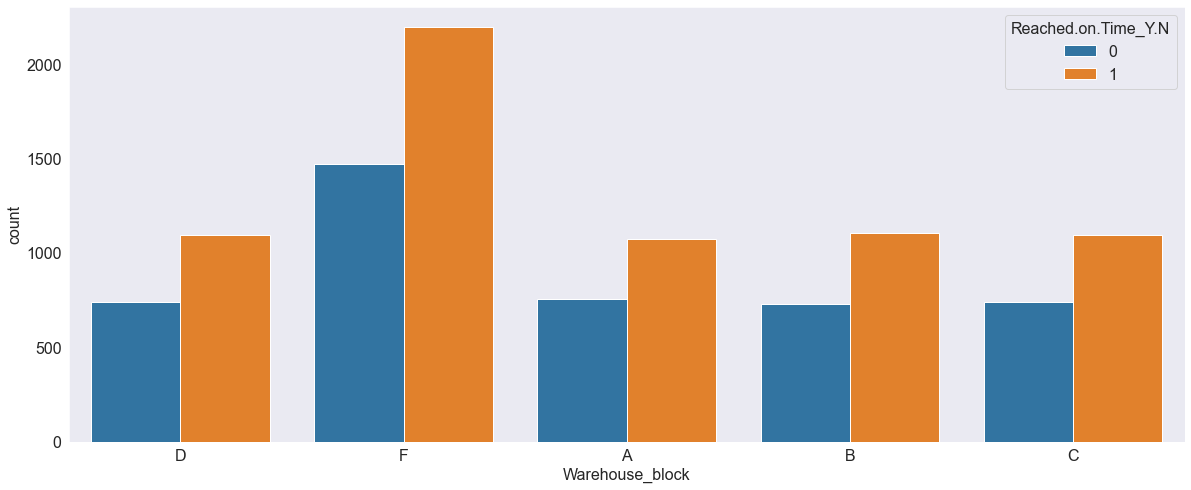

In [7]:
sns.countplot(x='Warehouse_block',hue='Reached.on.Time_Y.N',data=data)

### Does mode of shipment have any impact on delivery time ?

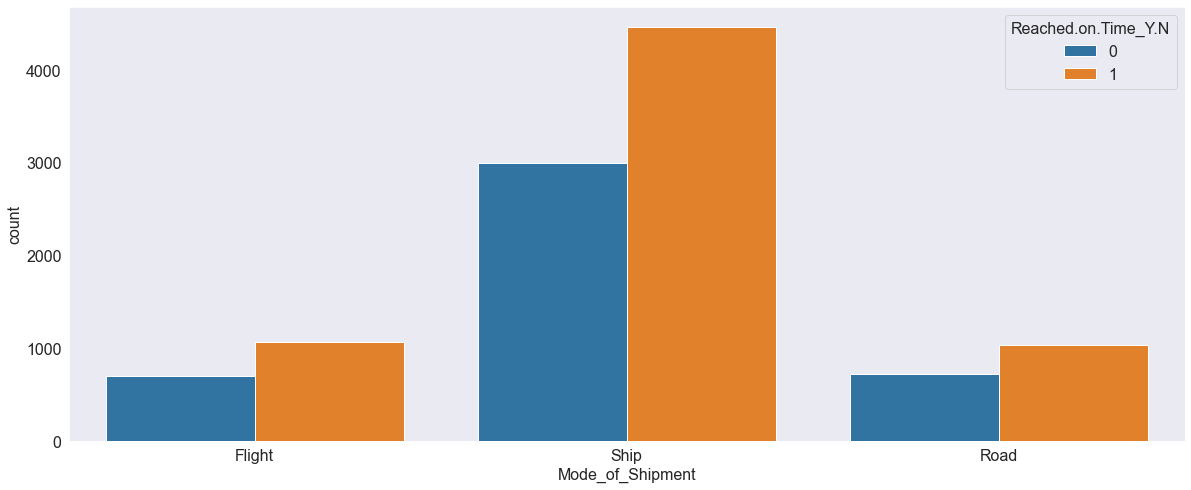

In [8]:
sns.countplot(x='Mode_of_Shipment',hue='Reached.on.Time_Y.N',data=data)

### Do important products have any impact on delivery time ?

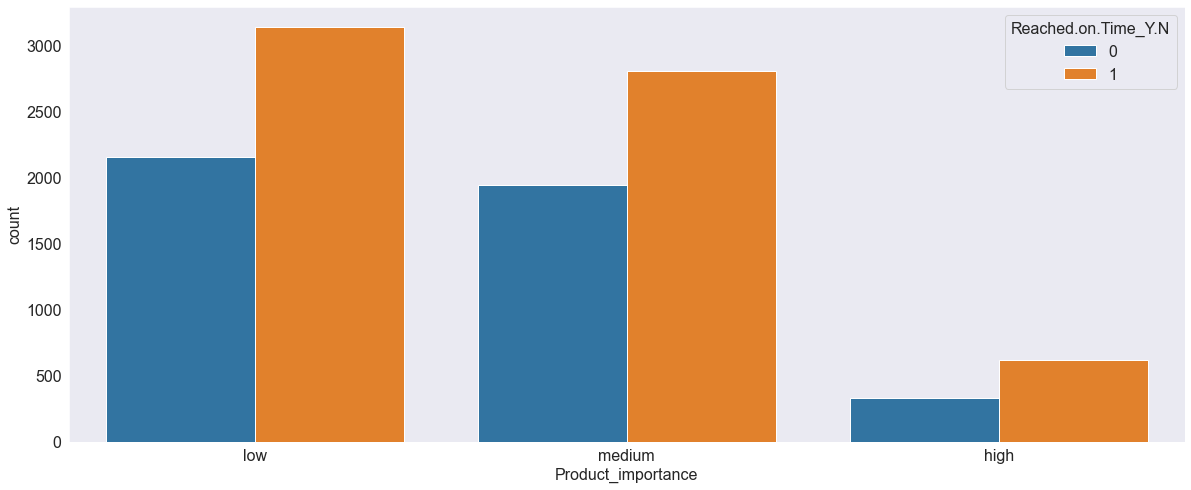

In [9]:
sns.countplot(x='Product_importance',hue='Reached.on.Time_Y.N',data=data)

### Does cost of the product impact the delivery time ?

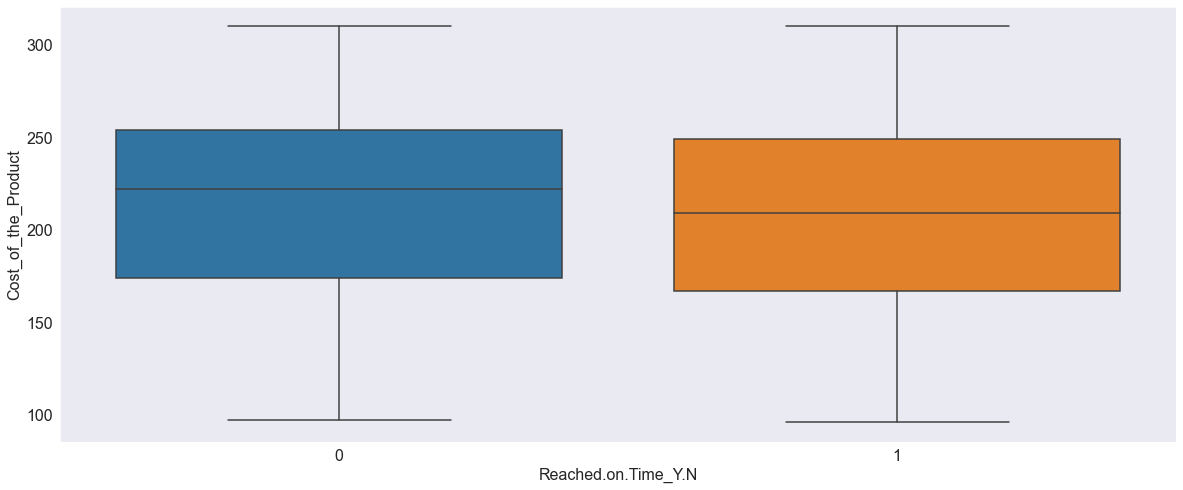

In [10]:
sns.boxplot(y='Cost_of_the_Product',x='Reached.on.Time_Y.N',data=data)

### Does discount on products have an impact on delivery time ?

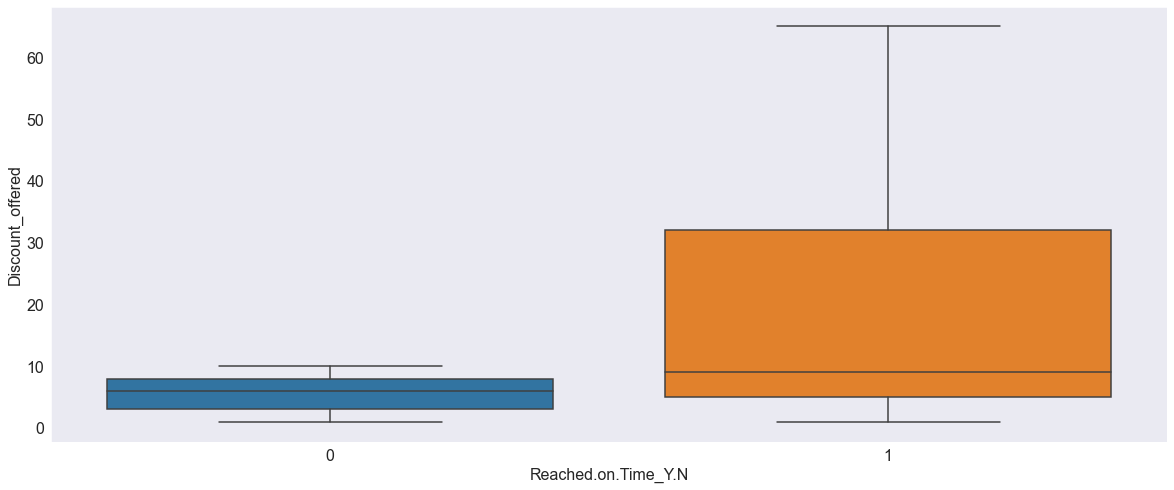

In [11]:
sns.boxplot(y='Discount_offered',x='Reached.on.Time_Y.N',data=data)

### Does weight of a product have an impact on delivery?

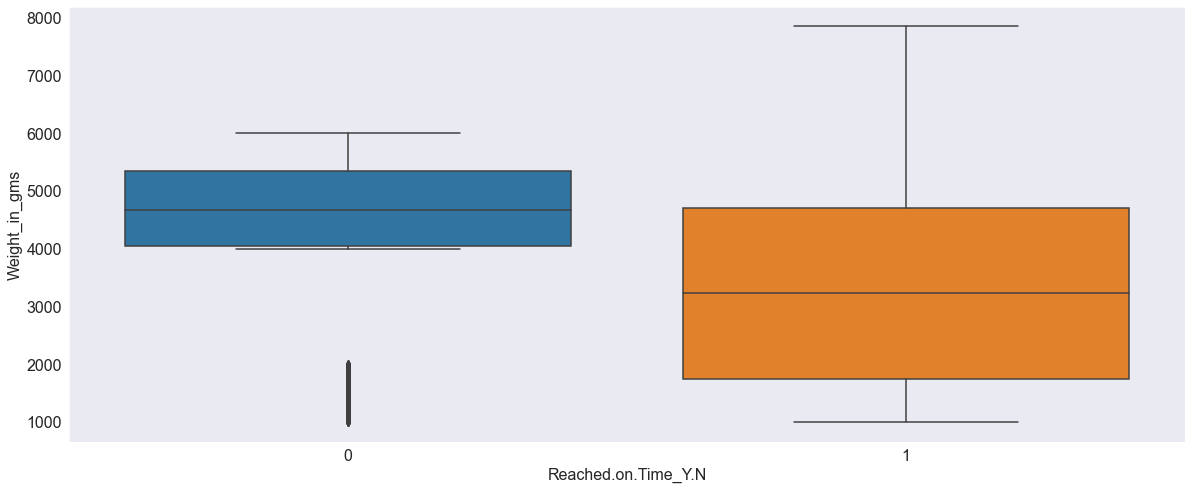

In [12]:
sns.boxplot(y='Weight_in_gms',x='Reached.on.Time_Y.N',data=data)

In [13]:
warehouse_block = pd.get_dummies(data['Warehouse_block']).iloc[:,:-1]
shipment_mode = pd.get_dummies(data['Mode_of_Shipment']).iloc[:,:-1]

In [14]:
data['Product_importance'] = data['Product_importance'].apply(lambda x: 0 if x == 'low' else (1 if x == 'medium' else 2))
data['Gender'] = data['Gender'].apply(lambda x: 0 if x=='M' else 1)

In [15]:
data.head(10)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,0,1,44,1233,1
1,2,F,Flight,4,5,216,2,0,0,59,3088,1
2,3,A,Flight,2,2,183,4,0,0,48,3374,1
3,4,B,Flight,3,3,176,4,1,0,10,1177,1
4,5,C,Flight,2,2,184,3,1,1,46,2484,1
5,6,F,Flight,3,1,162,3,1,1,12,1417,1
6,7,D,Flight,3,4,250,3,0,1,3,2371,1
7,8,F,Flight,4,1,233,2,0,1,48,2804,1
8,9,A,Flight,3,4,150,3,0,1,11,1861,1
9,10,B,Flight,3,2,164,3,1,1,29,1187,1


In [16]:
X = data.drop(columns=['ID','Warehouse_block', 'Mode_of_Shipment','Reached.on.Time_Y.N'])
y = data.iloc[:,-1].values

In [17]:
X = X.join(shipment_mode).join(warehouse_block)

In [18]:
X.shape

(10999, 14)

In [19]:
X.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Flight,Road,A,B,C,D
0,4,2,177,3,0,1,44,1233,1,0,0,0,0,1
1,4,5,216,2,0,0,59,3088,1,0,0,0,0,0
2,2,2,183,4,0,0,48,3374,1,0,1,0,0,0
3,3,3,176,4,1,0,10,1177,1,0,0,1,0,0
4,2,2,184,3,1,1,46,2484,1,0,0,0,1,0


### Correlation between Independent Variables

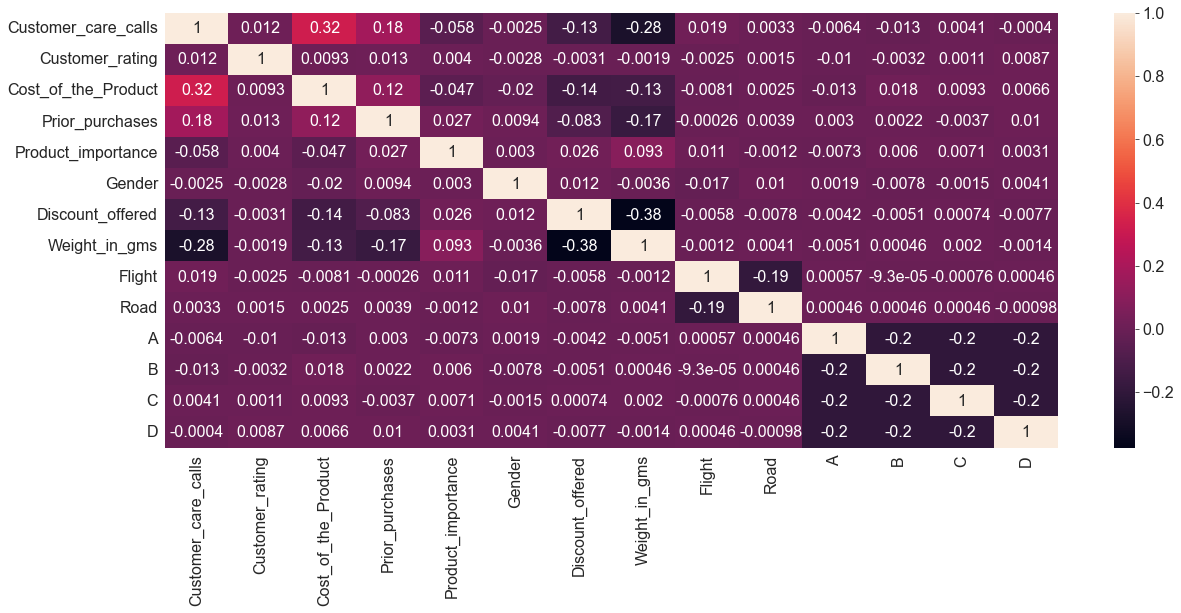

In [20]:
plt.figure(figsize=(20,8))
sns.heatmap(X.corr(),annot=True)

In [21]:
from sklearn.model_selection import train_test_split

### Train - Test Split
- 80% Train
- 20% Test

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

In [25]:
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [26]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report,confusion_matrix

### Model
- Hidden Layer Activation: tanh
- Output Layer Activation: sigmoid
- Loss Function: mean squared error
- Optimizer: SGD + Batches, so Batch Gradient Descent

In [27]:
def build_model(layers,lr=0.001):
    model = Sequential()
    model.add(Dense(layers[0], activation='tanh',input_shape=(X_train.shape[1],)))
    for nlayer in layers[1:]:
        model.add(Dense(nlayer,activation='tanh'))
    model.add(Dense(1, activation='sigmoid'))
              
    model.compile(
        optimizer=tf.keras.optimizers.SGD(lr),
        loss=tf.keras.losses.mean_squared_error,
        metrics=['accuracy']
    )
    return model

def model_summary(model,history):
    print(model.summary())
    print('---------------------------Classificationn Report------------------------------')
    
    y_pred = model.predict(X_test_sc)
    y_pred = y_pred.reshape(-1,)
    y_pred[y_pred>=0.5] = 1
    y_pred[y_pred<0.5] = 0
    
    print(classification_report(y_test,y_pred))
    print('--------------- Confusion Matrix ----------------')
    
    plt.figure(figsize=(10,8))
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
    plt.show()
    
    
    print('---------------------------------------------------------------')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

### Model #1
- 1 Hidden Layer
- 32 units

In [28]:
layers = [32]
model = build_model(layers)

In [29]:
history = model.fit(
                X_train_sc,
                y_train,
                batch_size = 64,
                epochs=100,
                steps_per_epoch=X_train.shape[0]//64,
                validation_batch_size=64,
                validation_data=(X_test_sc,y_test),
                validation_steps = X_test.shape[0]//64,
                verbose=2
            )

Epoch 1/100
137/137 - 1s - loss: 0.2891 - accuracy: 0.4945 - val_loss: 0.2866 - val_accuracy: 0.4959
Epoch 2/100
137/137 - 0s - loss: 0.2856 - accuracy: 0.5002 - val_loss: 0.2832 - val_accuracy: 0.5023
Epoch 3/100
137/137 - 0s - loss: 0.2830 - accuracy: 0.5027 - val_loss: 0.2798 - val_accuracy: 0.5069
Epoch 4/100
137/137 - 0s - loss: 0.2789 - accuracy: 0.5113 - val_loss: 0.2766 - val_accuracy: 0.5110
Epoch 5/100
137/137 - 0s - loss: 0.2753 - accuracy: 0.5151 - val_loss: 0.2734 - val_accuracy: 0.5156
Epoch 6/100
137/137 - 0s - loss: 0.2732 - accuracy: 0.5173 - val_loss: 0.2703 - val_accuracy: 0.5248
Epoch 7/100
137/137 - 0s - loss: 0.2699 - accuracy: 0.5232 - val_loss: 0.2673 - val_accuracy: 0.5299
Epoch 8/100
137/137 - 0s - loss: 0.2664 - accuracy: 0.5291 - val_loss: 0.2645 - val_accuracy: 0.5354
Epoch 9/100
137/137 - 0s - loss: 0.2646 - accuracy: 0.5325 - val_loss: 0.2617 - val_accuracy: 0.5423
Epoch 10/100
137/137 - 0s - loss: 0.2612 - accuracy: 0.5359 - val_loss: 0.2590 - val_accura

Epoch 82/100
137/137 - 0s - loss: 0.2020 - accuracy: 0.6425 - val_loss: 0.2011 - val_accuracy: 0.6521
Epoch 83/100
137/137 - 0s - loss: 0.2028 - accuracy: 0.6372 - val_loss: 0.2010 - val_accuracy: 0.6517
Epoch 84/100
137/137 - 0s - loss: 0.2008 - accuracy: 0.6464 - val_loss: 0.2009 - val_accuracy: 0.6517
Epoch 85/100
137/137 - 0s - loss: 0.2007 - accuracy: 0.6416 - val_loss: 0.2008 - val_accuracy: 0.6512
Epoch 86/100
137/137 - 0s - loss: 0.2039 - accuracy: 0.6394 - val_loss: 0.2007 - val_accuracy: 0.6512
Epoch 87/100
137/137 - 0s - loss: 0.2003 - accuracy: 0.6421 - val_loss: 0.2005 - val_accuracy: 0.6503
Epoch 88/100
137/137 - 0s - loss: 0.2002 - accuracy: 0.6480 - val_loss: 0.2004 - val_accuracy: 0.6521
Epoch 89/100
137/137 - 0s - loss: 0.2025 - accuracy: 0.6371 - val_loss: 0.2003 - val_accuracy: 0.6517
Epoch 90/100
137/137 - 0s - loss: 0.2015 - accuracy: 0.6366 - val_loss: 0.2002 - val_accuracy: 0.6521
Epoch 91/100
137/137 - 0s - loss: 0.2000 - accuracy: 0.6480 - val_loss: 0.2001 - v

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________
None
---------------------------Classificationn Report------------------------------
              precision    recall  f1-score   support

           0       0.58      0.56      0.57       895
           1       0.70      0.72      0.71      1305

    accuracy                           0.65      2200
   macro avg       0.64      0.64      0.64      2200
weighted avg       0.65      0.65      0.65      2200

--------------- Confusion Matrix ----------------


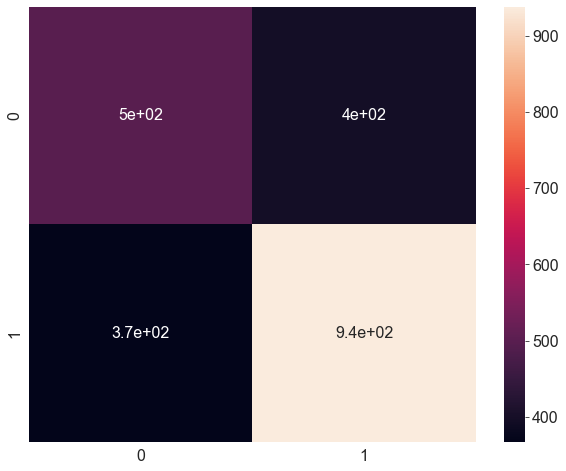

---------------------------------------------------------------


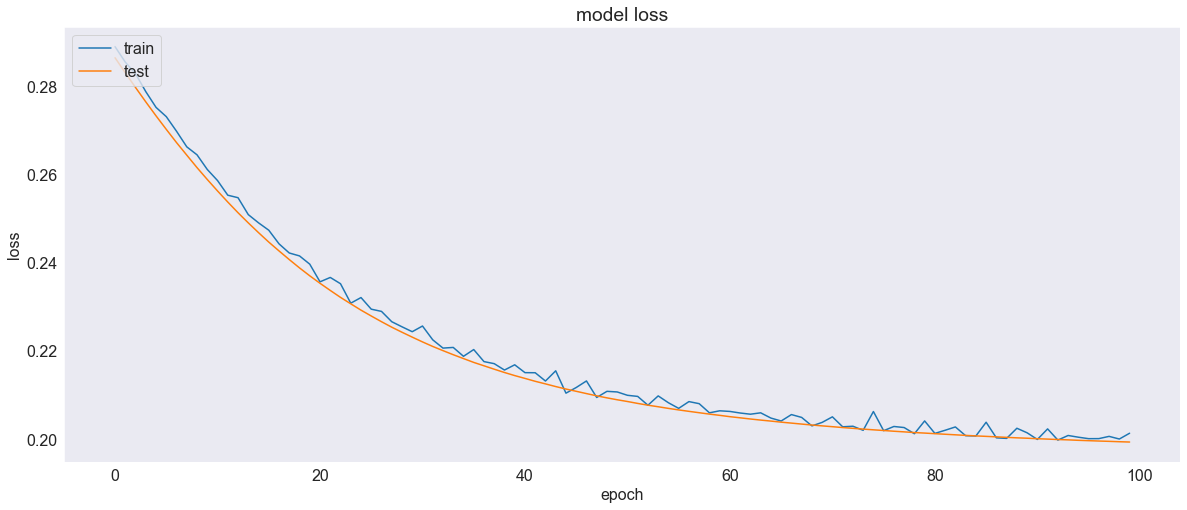

In [30]:
model_summary(model,history)

### Model #2 
- 2 Hidden Layers
- 64 and 32 units

In [31]:
layers = [64,32]
model = build_model(layers)

In [32]:
history = model.fit(
                X_train_sc,
                y_train,
                batch_size = 64,
                epochs=100,
                steps_per_epoch=X_train.shape[0]//64,
                validation_batch_size=64,
                validation_data=(X_test_sc,y_test),
                validation_steps = X_test.shape[0]//64,
                verbose=2
            )

Epoch 1/100
137/137 - 0s - loss: 0.2849 - accuracy: 0.4448 - val_loss: 0.2827 - val_accuracy: 0.4517
Epoch 2/100
137/137 - 0s - loss: 0.2784 - accuracy: 0.4600 - val_loss: 0.2767 - val_accuracy: 0.4655
Epoch 3/100
137/137 - 0s - loss: 0.2729 - accuracy: 0.4740 - val_loss: 0.2711 - val_accuracy: 0.4789
Epoch 4/100
137/137 - 0s - loss: 0.2676 - accuracy: 0.4846 - val_loss: 0.2659 - val_accuracy: 0.4926
Epoch 5/100
137/137 - 0s - loss: 0.2619 - accuracy: 0.5022 - val_loss: 0.2610 - val_accuracy: 0.5041
Epoch 6/100
137/137 - 0s - loss: 0.2576 - accuracy: 0.5145 - val_loss: 0.2565 - val_accuracy: 0.5161
Epoch 7/100
137/137 - 0s - loss: 0.2532 - accuracy: 0.5247 - val_loss: 0.2523 - val_accuracy: 0.5290
Epoch 8/100
137/137 - 0s - loss: 0.2484 - accuracy: 0.5431 - val_loss: 0.2484 - val_accuracy: 0.5381
Epoch 9/100
137/137 - 0s - loss: 0.2448 - accuracy: 0.5544 - val_loss: 0.2449 - val_accuracy: 0.5506
Epoch 10/100
137/137 - 0s - loss: 0.2420 - accuracy: 0.5603 - val_loss: 0.2416 - val_accura

Epoch 82/100
137/137 - 0s - loss: 0.1963 - accuracy: 0.6435 - val_loss: 0.1968 - val_accuracy: 0.6475
Epoch 83/100
137/137 - 0s - loss: 0.1976 - accuracy: 0.6446 - val_loss: 0.1967 - val_accuracy: 0.6484
Epoch 84/100
137/137 - 0s - loss: 0.1942 - accuracy: 0.6515 - val_loss: 0.1966 - val_accuracy: 0.6489
Epoch 85/100
137/137 - 0s - loss: 0.1983 - accuracy: 0.6390 - val_loss: 0.1966 - val_accuracy: 0.6489
Epoch 86/100
137/137 - 0s - loss: 0.1954 - accuracy: 0.6520 - val_loss: 0.1965 - val_accuracy: 0.6484
Epoch 87/100
137/137 - 0s - loss: 0.1964 - accuracy: 0.6457 - val_loss: 0.1965 - val_accuracy: 0.6484
Epoch 88/100
137/137 - 0s - loss: 0.1986 - accuracy: 0.6361 - val_loss: 0.1965 - val_accuracy: 0.6484
Epoch 89/100
137/137 - 0s - loss: 0.1953 - accuracy: 0.6515 - val_loss: 0.1964 - val_accuracy: 0.6484
Epoch 90/100
137/137 - 0s - loss: 0.1968 - accuracy: 0.6458 - val_loss: 0.1963 - val_accuracy: 0.6480
Epoch 91/100
137/137 - 0s - loss: 0.1953 - accuracy: 0.6511 - val_loss: 0.1963 - v

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                960       
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 3,073
Trainable params: 3,073
Non-trainable params: 0
_________________________________________________________________
None
---------------------------Classificationn Report------------------------------
              precision    recall  f1-score   support

           0       0.57      0.60      0.58       895
           1       0.71      0.69      0.70      1305

    accuracy                           0.65      2200
   macro avg       0.64      0.64      0.64      2200
weighted avg       0.65  

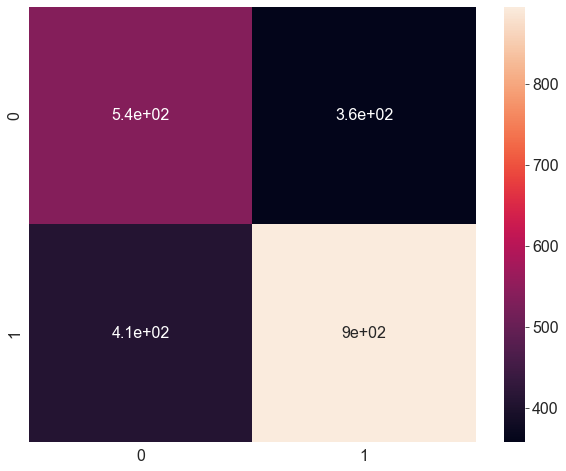

---------------------------------------------------------------


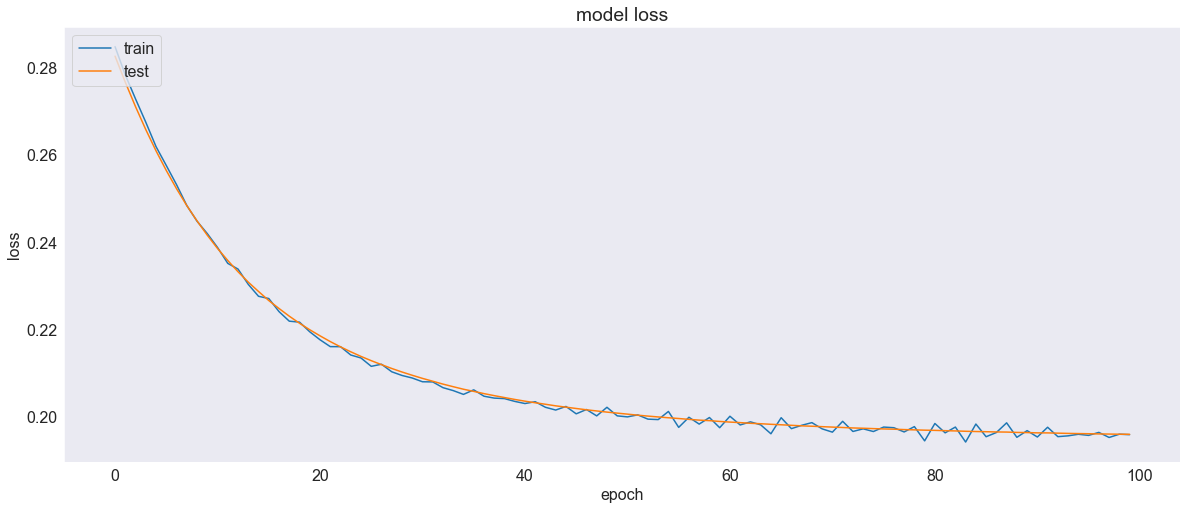

In [33]:
model_summary(model,history)

### Model #3
- 3 Hidden Layers
- 128 64 and 32 units

In [34]:
layers = [128,64,32]
model = build_model(layers)

In [35]:
history = model.fit(
                X_train_sc,
                y_train,
                batch_size = 64,
                epochs=100,
                steps_per_epoch=X_train.shape[0]//64,
                validation_batch_size=64,
                validation_data=(X_test_sc,y_test),
                validation_steps = X_test.shape[0]//64,
                verbose=2
            )

Epoch 1/100
137/137 - 0s - loss: 0.2677 - accuracy: 0.5123 - val_loss: 0.2591 - val_accuracy: 0.5377
Epoch 2/100
137/137 - 0s - loss: 0.2559 - accuracy: 0.5353 - val_loss: 0.2486 - val_accuracy: 0.5611
Epoch 3/100
137/137 - 0s - loss: 0.2456 - accuracy: 0.5556 - val_loss: 0.2398 - val_accuracy: 0.5717
Epoch 4/100
137/137 - 0s - loss: 0.2379 - accuracy: 0.5732 - val_loss: 0.2325 - val_accuracy: 0.5928
Epoch 5/100
137/137 - 0s - loss: 0.2307 - accuracy: 0.5874 - val_loss: 0.2265 - val_accuracy: 0.6016
Epoch 6/100
137/137 - 0s - loss: 0.2258 - accuracy: 0.5981 - val_loss: 0.2216 - val_accuracy: 0.6071
Epoch 7/100
137/137 - 0s - loss: 0.2201 - accuracy: 0.6084 - val_loss: 0.2177 - val_accuracy: 0.6149
Epoch 8/100
137/137 - 0s - loss: 0.2167 - accuracy: 0.6089 - val_loss: 0.2144 - val_accuracy: 0.6176
Epoch 9/100
137/137 - 0s - loss: 0.2141 - accuracy: 0.6172 - val_loss: 0.2117 - val_accuracy: 0.6282
Epoch 10/100
137/137 - 0s - loss: 0.2111 - accuracy: 0.6242 - val_loss: 0.2095 - val_accura

Epoch 82/100
137/137 - 0s - loss: 0.1935 - accuracy: 0.6454 - val_loss: 0.1952 - val_accuracy: 0.6374
Epoch 83/100
137/137 - 0s - loss: 0.1950 - accuracy: 0.6437 - val_loss: 0.1952 - val_accuracy: 0.6379
Epoch 84/100
137/137 - 0s - loss: 0.1934 - accuracy: 0.6513 - val_loss: 0.1952 - val_accuracy: 0.6374
Epoch 85/100
137/137 - 0s - loss: 0.1960 - accuracy: 0.6353 - val_loss: 0.1952 - val_accuracy: 0.6369
Epoch 86/100
137/137 - 0s - loss: 0.1954 - accuracy: 0.6456 - val_loss: 0.1952 - val_accuracy: 0.6383
Epoch 87/100
137/137 - 0s - loss: 0.1922 - accuracy: 0.6487 - val_loss: 0.1951 - val_accuracy: 0.6369
Epoch 88/100
137/137 - 0s - loss: 0.1944 - accuracy: 0.6493 - val_loss: 0.1952 - val_accuracy: 0.6365
Epoch 89/100
137/137 - 0s - loss: 0.1952 - accuracy: 0.6458 - val_loss: 0.1951 - val_accuracy: 0.6388
Epoch 90/100
137/137 - 0s - loss: 0.1947 - accuracy: 0.6412 - val_loss: 0.1951 - val_accuracy: 0.6383
Epoch 91/100
137/137 - 0s - loss: 0.1945 - accuracy: 0.6443 - val_loss: 0.1951 - v

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               1920      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 12,289
Trainable params: 12,289
Non-trainable params: 0
_________________________________________________________________
None
---------------------------Classificationn Report------------------------------
              precision    recall  f1-score   support

           0       0.55      0.58      0.57       895
           1       0.70      0.68      0.69      1305


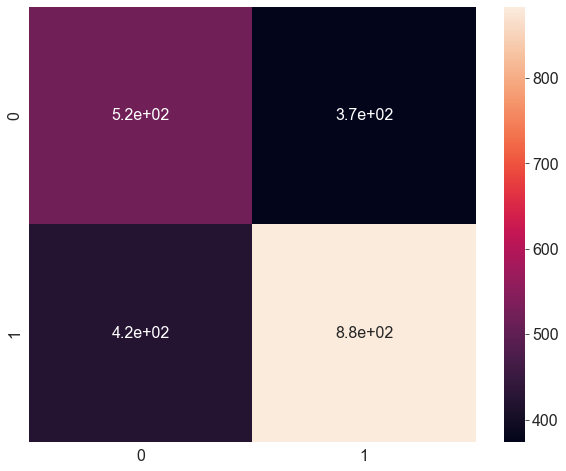

---------------------------------------------------------------


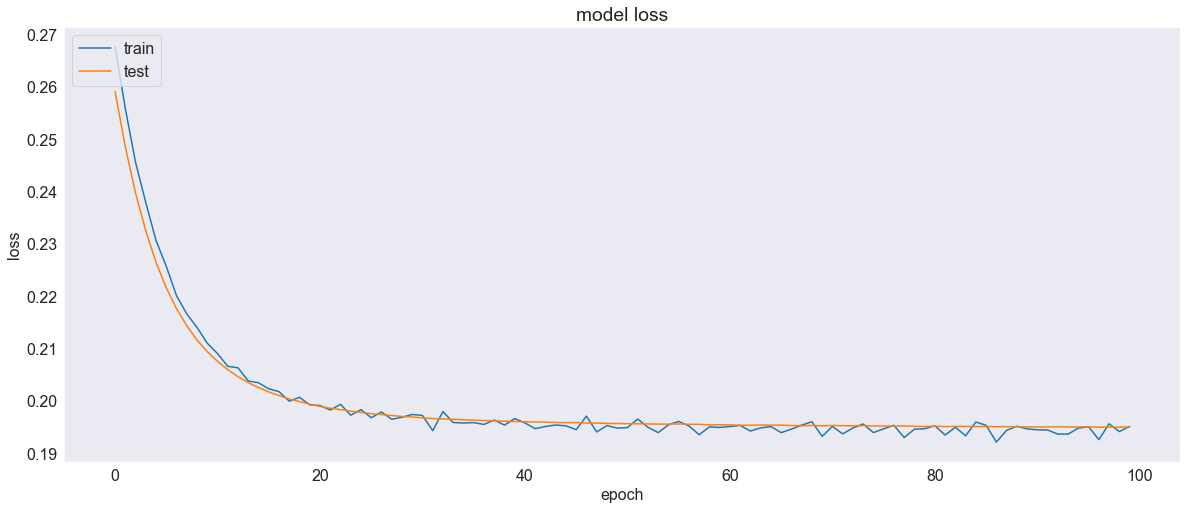

In [36]:
model_summary(model,history)

### Model #4
- 3 Hidden Layers
- 256 128 and 64 units

In [37]:
layers = [256,128,64]
model = build_model(layers)

In [38]:
history = model.fit(
                X_train_sc,
                y_train,
                batch_size = 64,
                epochs=100,
                steps_per_epoch=X_train.shape[0]//64,
                validation_batch_size=64,
                validation_data=(X_test_sc,y_test),
                validation_steps = X_test.shape[0]//64,
                verbose=2
            )

Epoch 1/100
137/137 - 1s - loss: 0.2709 - accuracy: 0.4780 - val_loss: 0.2626 - val_accuracy: 0.5069
Epoch 2/100
137/137 - 0s - loss: 0.2537 - accuracy: 0.5272 - val_loss: 0.2474 - val_accuracy: 0.5620
Epoch 3/100
137/137 - 0s - loss: 0.2403 - accuracy: 0.5739 - val_loss: 0.2359 - val_accuracy: 0.5864
Epoch 4/100
137/137 - 0s - loss: 0.2305 - accuracy: 0.5963 - val_loss: 0.2275 - val_accuracy: 0.6048
Epoch 5/100
137/137 - 0s - loss: 0.2232 - accuracy: 0.6121 - val_loss: 0.2213 - val_accuracy: 0.6199
Epoch 6/100
137/137 - 0s - loss: 0.2182 - accuracy: 0.6187 - val_loss: 0.2166 - val_accuracy: 0.6209
Epoch 7/100
137/137 - 0s - loss: 0.2140 - accuracy: 0.6284 - val_loss: 0.2130 - val_accuracy: 0.6282
Epoch 8/100
137/137 - 0s - loss: 0.2111 - accuracy: 0.6337 - val_loss: 0.2102 - val_accuracy: 0.6356
Epoch 9/100
137/137 - 0s - loss: 0.2084 - accuracy: 0.6378 - val_loss: 0.2080 - val_accuracy: 0.6411
Epoch 10/100
137/137 - 0s - loss: 0.2061 - accuracy: 0.6389 - val_loss: 0.2062 - val_accura

Epoch 82/100
137/137 - 0s - loss: 0.1938 - accuracy: 0.6483 - val_loss: 0.1945 - val_accuracy: 0.6425
Epoch 83/100
137/137 - 0s - loss: 0.1935 - accuracy: 0.6473 - val_loss: 0.1946 - val_accuracy: 0.6425
Epoch 84/100
137/137 - 0s - loss: 0.1935 - accuracy: 0.6489 - val_loss: 0.1946 - val_accuracy: 0.6406
Epoch 85/100
137/137 - 0s - loss: 0.1948 - accuracy: 0.6433 - val_loss: 0.1946 - val_accuracy: 0.6434
Epoch 86/100
137/137 - 0s - loss: 0.1946 - accuracy: 0.6441 - val_loss: 0.1945 - val_accuracy: 0.6397
Epoch 87/100
137/137 - 0s - loss: 0.1934 - accuracy: 0.6473 - val_loss: 0.1945 - val_accuracy: 0.6425
Epoch 88/100
137/137 - 0s - loss: 0.1941 - accuracy: 0.6509 - val_loss: 0.1944 - val_accuracy: 0.6429
Epoch 89/100
137/137 - 0s - loss: 0.1928 - accuracy: 0.6480 - val_loss: 0.1945 - val_accuracy: 0.6420
Epoch 90/100
137/137 - 0s - loss: 0.1961 - accuracy: 0.6388 - val_loss: 0.1945 - val_accuracy: 0.6429
Epoch 91/100
137/137 - 0s - loss: 0.1928 - accuracy: 0.6511 - val_loss: 0.1944 - v

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 256)               3840      
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 65        
Total params: 45,057
Trainable params: 45,057
Non-trainable params: 0
_________________________________________________________________
None
---------------------------Classificationn Report------------------------------
              precision    recall  f1-score   support

           0       0.56      0.59      0.57       895
           1       0.71      0.68      0.69      1305


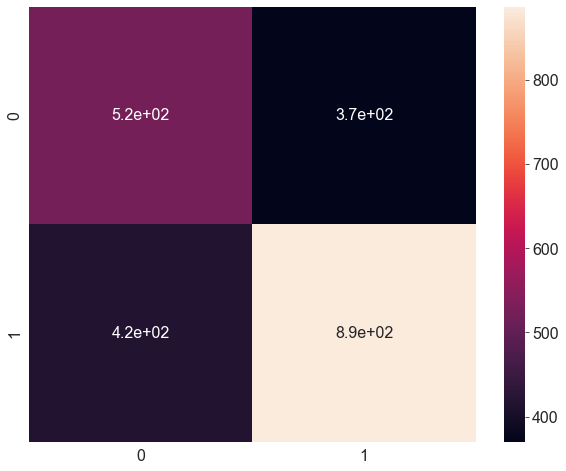

---------------------------------------------------------------


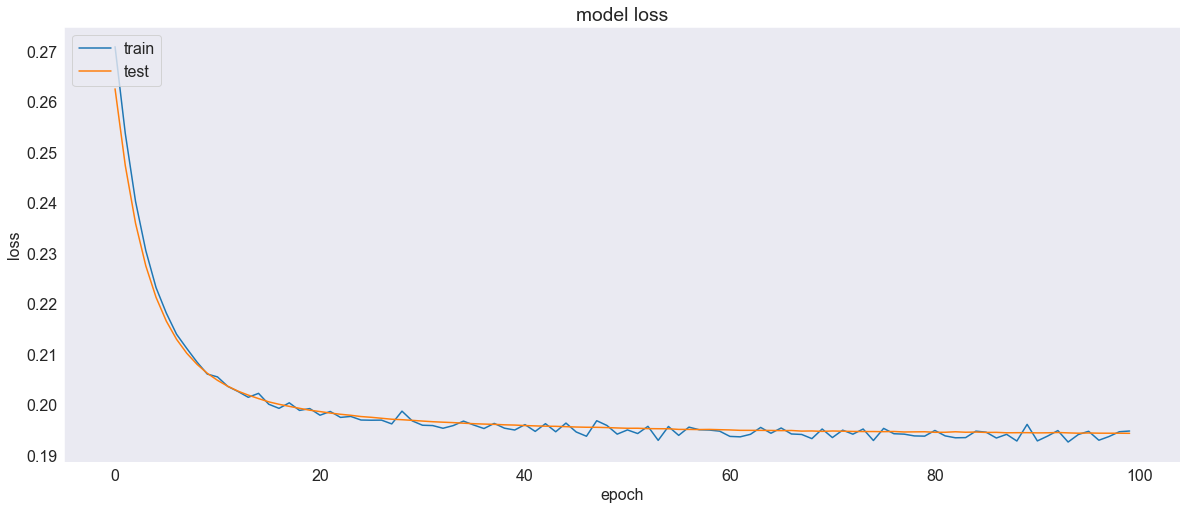

In [39]:
model_summary(model,history)

### Model #5 
- 2 Hidden Layers
- 512 and 256 units
- lr 0.01

In [43]:
layers = [512,256]
model = build_model(layers,lr=0.01)

In [44]:
history = model.fit(
                X_train_sc,
                y_train,
                batch_size = 64,
                epochs=100,
                steps_per_epoch=X_train.shape[0]//64,
                validation_batch_size=64,
                validation_data=(X_test_sc,y_test),
                validation_steps = X_test.shape[0]//64,
                verbose=2
            )

Epoch 1/100
137/137 - 1s - loss: 0.2268 - accuracy: 0.5969 - val_loss: 0.2059 - val_accuracy: 0.6618
Epoch 2/100
137/137 - 0s - loss: 0.2017 - accuracy: 0.6483 - val_loss: 0.1987 - val_accuracy: 0.6618
Epoch 3/100
137/137 - 0s - loss: 0.1975 - accuracy: 0.6509 - val_loss: 0.1967 - val_accuracy: 0.6498
Epoch 4/100
137/137 - 0s - loss: 0.1971 - accuracy: 0.6476 - val_loss: 0.1957 - val_accuracy: 0.6471
Epoch 5/100
137/137 - 0s - loss: 0.1947 - accuracy: 0.6529 - val_loss: 0.1952 - val_accuracy: 0.6466
Epoch 6/100
137/137 - 0s - loss: 0.1960 - accuracy: 0.6465 - val_loss: 0.1949 - val_accuracy: 0.6484
Epoch 7/100
137/137 - 0s - loss: 0.1948 - accuracy: 0.6476 - val_loss: 0.1947 - val_accuracy: 0.6475
Epoch 8/100
137/137 - 0s - loss: 0.1942 - accuracy: 0.6504 - val_loss: 0.1946 - val_accuracy: 0.6466
Epoch 9/100
137/137 - 0s - loss: 0.1954 - accuracy: 0.6426 - val_loss: 0.1945 - val_accuracy: 0.6438
Epoch 10/100
137/137 - 0s - loss: 0.1942 - accuracy: 0.6456 - val_loss: 0.1943 - val_accura

Epoch 82/100
137/137 - 0s - loss: 0.1956 - accuracy: 0.6386 - val_loss: 0.1937 - val_accuracy: 0.6429
Epoch 83/100
137/137 - 0s - loss: 0.1933 - accuracy: 0.6384 - val_loss: 0.1941 - val_accuracy: 0.6411
Epoch 84/100
137/137 - 0s - loss: 0.1936 - accuracy: 0.6463 - val_loss: 0.1935 - val_accuracy: 0.6480
Epoch 85/100
137/137 - 0s - loss: 0.1938 - accuracy: 0.6382 - val_loss: 0.1935 - val_accuracy: 0.6480
Epoch 86/100
137/137 - 0s - loss: 0.1934 - accuracy: 0.6471 - val_loss: 0.1936 - val_accuracy: 0.6452
Epoch 87/100
137/137 - 0s - loss: 0.1944 - accuracy: 0.6397 - val_loss: 0.1942 - val_accuracy: 0.6397
Epoch 88/100
137/137 - 0s - loss: 0.1925 - accuracy: 0.6435 - val_loss: 0.1934 - val_accuracy: 0.6471
Epoch 89/100
137/137 - 0s - loss: 0.1947 - accuracy: 0.6406 - val_loss: 0.1934 - val_accuracy: 0.6452
Epoch 90/100
137/137 - 0s - loss: 0.1921 - accuracy: 0.6498 - val_loss: 0.1936 - val_accuracy: 0.6457
Epoch 91/100
137/137 - 0s - loss: 0.1941 - accuracy: 0.6412 - val_loss: 0.1937 - v

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               7680      
_________________________________________________________________
dense_17 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 257       
Total params: 139,265
Trainable params: 139,265
Non-trainable params: 0
_________________________________________________________________
None
---------------------------Classificationn Report------------------------------
              precision    recall  f1-score   support

           0       0.56      0.60      0.58       895
           1       0.71      0.68      0.69      1305

    accuracy                           0.65      2200
   macro avg       0.64      0.64      0.64      2200
weighted avg       0.

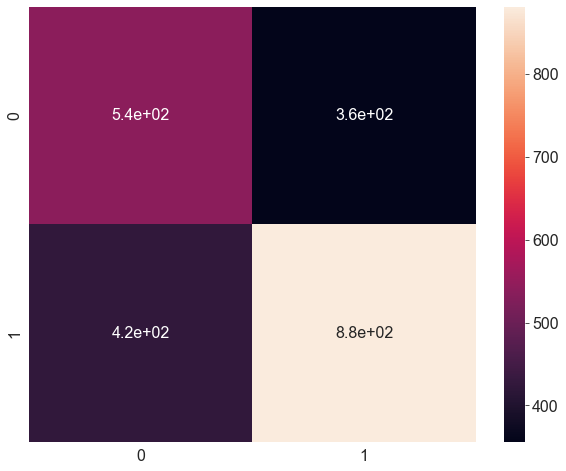

---------------------------------------------------------------


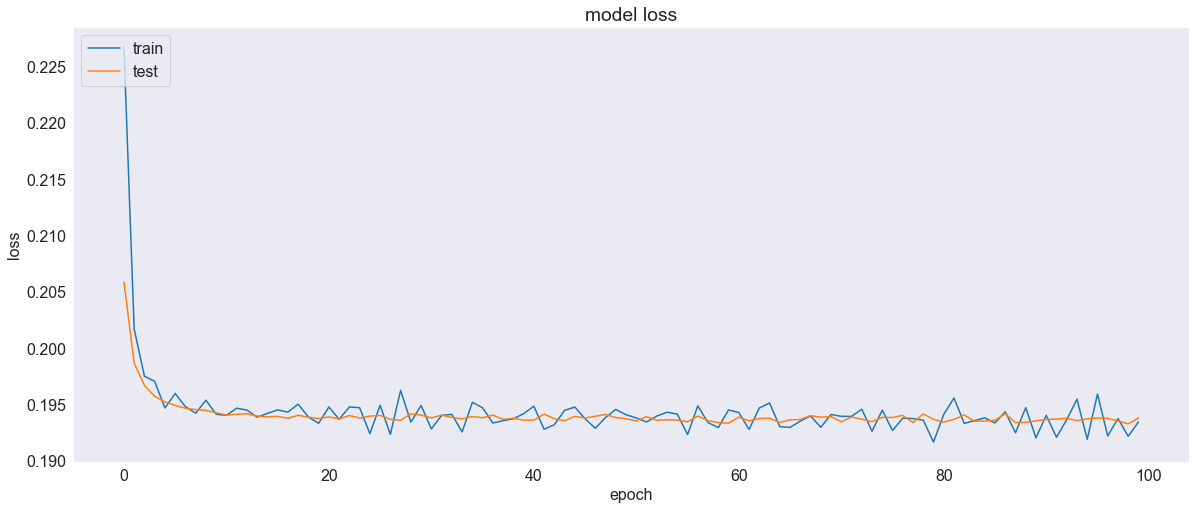

In [45]:
model_summary(model,history)

### Model #6 
- 3 Hidden Layers
- 8 8 and 4 units

In [48]:
layers = [8,8,4]
model = build_model(layers)

In [49]:
history = model.fit(
                X_train_sc,
                y_train,
                batch_size = 64,
                epochs=100,
                steps_per_epoch=X_train.shape[0]//64,
                validation_batch_size=64,
                validation_data=(X_test_sc,y_test),
                validation_steps = X_test.shape[0]//64,
                verbose=2
            )

Epoch 1/100
137/137 - 0s - loss: 0.2671 - accuracy: 0.5587 - val_loss: 0.2635 - val_accuracy: 0.5597
Epoch 2/100
137/137 - 0s - loss: 0.2649 - accuracy: 0.5614 - val_loss: 0.2608 - val_accuracy: 0.5634
Epoch 3/100
137/137 - 0s - loss: 0.2619 - accuracy: 0.5655 - val_loss: 0.2583 - val_accuracy: 0.5676
Epoch 4/100
137/137 - 0s - loss: 0.2601 - accuracy: 0.5674 - val_loss: 0.2559 - val_accuracy: 0.5694
Epoch 5/100
137/137 - 0s - loss: 0.2571 - accuracy: 0.5749 - val_loss: 0.2536 - val_accuracy: 0.5722
Epoch 6/100
137/137 - 0s - loss: 0.2549 - accuracy: 0.5762 - val_loss: 0.2515 - val_accuracy: 0.5749
Epoch 7/100
137/137 - 0s - loss: 0.2526 - accuracy: 0.5781 - val_loss: 0.2494 - val_accuracy: 0.5781
Epoch 8/100
137/137 - 0s - loss: 0.2515 - accuracy: 0.5800 - val_loss: 0.2475 - val_accuracy: 0.5836
Epoch 9/100
137/137 - 0s - loss: 0.2483 - accuracy: 0.5867 - val_loss: 0.2457 - val_accuracy: 0.5869
Epoch 10/100
137/137 - 0s - loss: 0.2481 - accuracy: 0.5874 - val_loss: 0.2439 - val_accura

Epoch 82/100
137/137 - 0s - loss: 0.2112 - accuracy: 0.6405 - val_loss: 0.2088 - val_accuracy: 0.6452
Epoch 83/100
137/137 - 0s - loss: 0.2116 - accuracy: 0.6325 - val_loss: 0.2087 - val_accuracy: 0.6471
Epoch 84/100
137/137 - 0s - loss: 0.2102 - accuracy: 0.6372 - val_loss: 0.2086 - val_accuracy: 0.6471
Epoch 85/100
137/137 - 0s - loss: 0.2111 - accuracy: 0.6388 - val_loss: 0.2084 - val_accuracy: 0.6484
Epoch 86/100
137/137 - 0s - loss: 0.2111 - accuracy: 0.6366 - val_loss: 0.2083 - val_accuracy: 0.6484
Epoch 87/100
137/137 - 0s - loss: 0.2092 - accuracy: 0.6443 - val_loss: 0.2082 - val_accuracy: 0.6480
Epoch 88/100
137/137 - 0s - loss: 0.2101 - accuracy: 0.6346 - val_loss: 0.2081 - val_accuracy: 0.6471
Epoch 89/100
137/137 - 0s - loss: 0.2089 - accuracy: 0.6413 - val_loss: 0.2079 - val_accuracy: 0.6452
Epoch 90/100
137/137 - 0s - loss: 0.2108 - accuracy: 0.6371 - val_loss: 0.2078 - val_accuracy: 0.6452
Epoch 91/100
137/137 - 0s - loss: 0.2102 - accuracy: 0.6334 - val_loss: 0.2077 - v

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 8)                 120       
_________________________________________________________________
dense_24 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_25 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 5         
Total params: 233
Trainable params: 233
Non-trainable params: 0
_________________________________________________________________
None
---------------------------Classificationn Report------------------------------
              precision    recall  f1-score   support

           0       0.57      0.52      0.54       895
           1       0.69      0.73      0.71      1305

    a

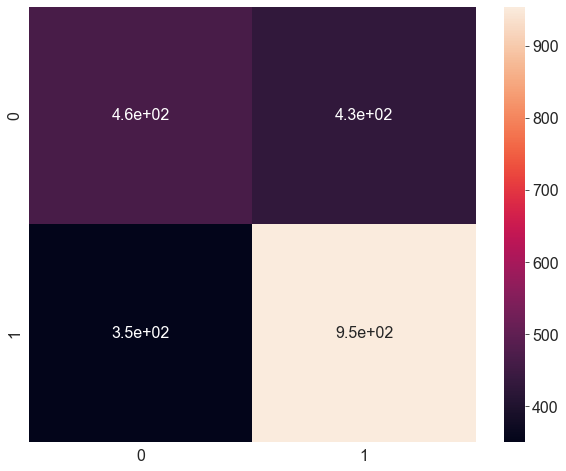

---------------------------------------------------------------


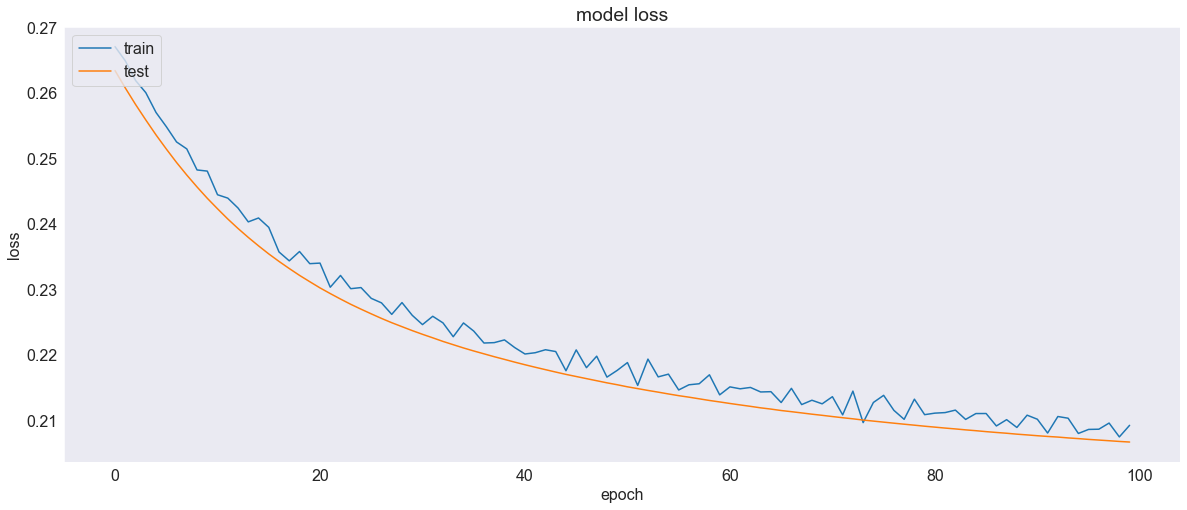

In [50]:
model_summary(model,history)